In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [171]:
data=pd.read_csv('Country-data.csv')

In [172]:
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [173]:
data.shape

(167, 10)

In [174]:
data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [175]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


In [176]:
round(100*(data.isnull().sum()/len(data.index)), 2)

country       0.0
child_mort    0.0
exports       0.0
health        0.0
imports       0.0
income        0.0
inflation     0.0
life_expec    0.0
total_fer     0.0
gdpp          0.0
dtype: float64

There is no null data and all the columns are numerical so data is completely fit

In [177]:
#checking outliers
data.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
90%,100.220000,70.800000,10.940000,75.420000,41220.000000,16.640000,80.400000,5.322000,41840.000000
95%,116.000000,80.570000,11.570000,81.140000,48290.000000,20.870000,81.400000,5.861000,48610.000000
99%,153.400000,160.480000,13.474000,146.080000,84374.000000,41.478000,82.370000,6.563600,79088.000000


There is no outlier in data as such, all the values are increasing gradually only gdpp and inflation are increasing at high rate


{'whiskers': [<matplotlib.lines.Line2D at 0x1d5b930e630>,
 'caps': [<matplotlib.lines.Line2D at 0x1d5b930ecf8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d5b930e278>],
 'medians': [<matplotlib.lines.Line2D at 0x1d5b8e2c3c8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d5b8e2c710>],
 'means': []}

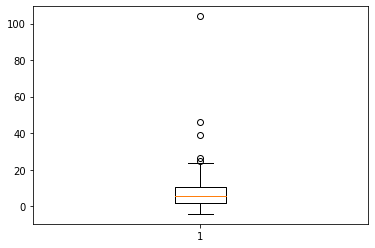

In [178]:
plt.boxplot(data['inflation'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1d5b92efe80>,
 'caps': [<matplotlib.lines.Line2D at 0x1d5b92cf5c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d5b92efac8>],
 'medians': [<matplotlib.lines.Line2D at 0x1d5b92cfc50>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d5b92cff98>],
 'means': []}

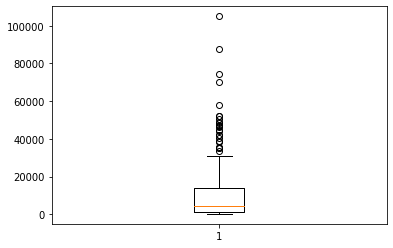

In [179]:
plt.boxplot(data['gdpp'])

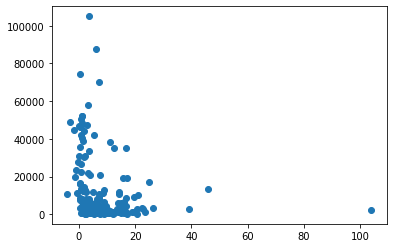

In [180]:
plt.scatter(data['inflation'],data['gdpp'])

Higher gdpp is fine but it's better to remove outlier in inflation as it is very high and there is only one value so will impact the overall data
so it's better to impute it with mean value

In [181]:
#outlier treatment for inflation
mean=data['inflation'].mean()
data['inflation']=np.where(data['inflation']>50,mean,data['inflation'])


In [182]:
data['inflation'].describe(percentiles=[.25,.5,.75,.90,.95,.99])

count    167.000000
mean       7.205676
std        7.458896
min       -4.210000
25%        1.810000
50%        5.390000
75%       10.350000
90%       16.600000
95%       20.770000
99%       30.818000
max       45.900000
Name: inflation, dtype: float64

In [183]:
#feature variable
data_x=data.drop('country',axis=1)
#response variable
data_y=data['country']

In [184]:
normalized_data_x=(data_x-data_x.mean())/data_x.std()

In [185]:
normalized_data_x.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.287660,-1.134867,0.278251,-0.082208,-0.805822,0.299552,-1.614237,1.897176,-0.677143
1,-0.537333,-0.478220,-0.096725,0.070624,-0.374243,-0.364085,0.645924,-0.857394,-0.484167
2,-0.272015,-0.098824,-0.963176,-0.639838,-0.220182,1.192445,0.668413,-0.038289,-0.463980
3,2.001787,0.773056,-1.443729,-0.164820,-0.583289,2.037074,-1.175698,2.121770,-0.514720
4,-0.693548,0.160186,-0.286034,0.496076,0.101427,-0.772993,0.702147,-0.540321,-0.041692


### performing pca

In [186]:
normalized_data_x.shape

(167, 9)

In [187]:
from sklearn.decomposition import PCA

In [188]:
pca=PCA(random_state=50)

In [189]:
pca.fit(normalized_data_x)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=50,
    svd_solver='auto', tol=0.0, whiten=False)

In [190]:
pca.components_

array([[-0.41596866,  0.28350514,  0.1544384 ,  0.16194018,  0.39887249,
        -0.19593914,  0.42570362, -0.4021747 ,  0.39504379],
       [ 0.19371429,  0.61288031, -0.24164017,  0.67214968,  0.02245272,
        -0.00974979, -0.22305593,  0.15572868, -0.04552774],
       [-0.12945096,  0.14312286, -0.65302901, -0.26420269,  0.21371548,
         0.62997918,  0.14176904, -0.06190272,  0.00546581],
       [ 0.37498776,  0.02761711,  0.23843168, -0.18002131,  0.4816756 ,
         0.15697008, -0.19379876,  0.39895915,  0.56212702],
       [-0.14246633,  0.05852592,  0.59966673,  0.2373312 , -0.16298614,
         0.72122926,  0.0356355 , -0.05544264, -0.09629063],
       [ 0.18974545, -0.06387258,  0.00853092, -0.02840456,  0.16739882,
         0.05858244, -0.61341689, -0.74224525,  0.01935999],
       [-0.18735142, -0.69921054, -0.23391777,  0.57871435,  0.13918357,
         0.09379899, -0.06265334,  0.08368382,  0.21743389],
       [ 0.66907883, -0.09378969, -0.08566615,  0.12783696, -0

In [191]:
pca.explained_variance_ratio_

array([0.45990859, 0.17181749, 0.13509854, 0.10784799, 0.07093037,
       0.02491494, 0.01268166, 0.00933932, 0.0074611 ])

In [192]:
cum_var = np.cumsum(pca.explained_variance_ratio_)

In [193]:
cum_var

array([0.45990859, 0.63172608, 0.76682462, 0.87467261, 0.94560299,
       0.97051792, 0.98319958, 0.9925389 , 1.        ])

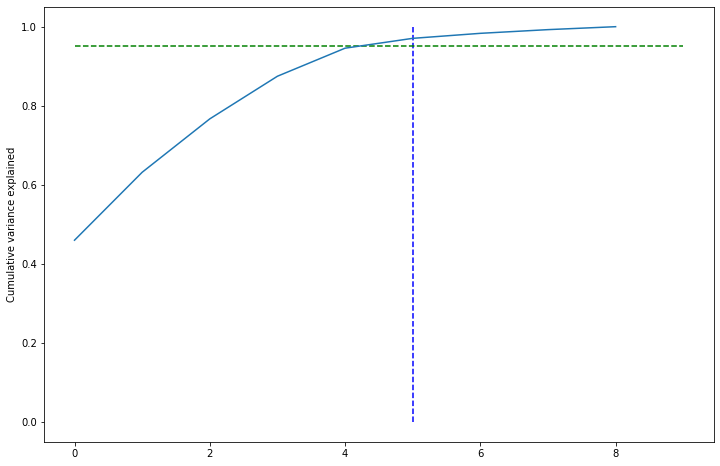

In [194]:
fig = plt.figure(figsize=[12,8])
plt.vlines(x=5, ymax=1, ymin=0, colors="b", linestyles="--")
plt.hlines(y=0.95, xmax=9, xmin=0, colors="g", linestyles="--")
plt.plot(cum_var)
plt.ylabel("Cumulative variance explained")
plt.show()

95% variation is explained with 5 components so let's perform pca with 5 components

In [195]:
from sklearn.decomposition import IncrementalPCA

In [196]:
pca_final = IncrementalPCA(n_components=5)

In [197]:
data_pca=pca_final.fit_transform(normalized_data_x)

In [198]:
pca_final.components_

array([[-0.41625784,  0.28352326,  0.15442966,  0.16200883,  0.39886096,
        -0.19605548,  0.42572469, -0.4017719 ,  0.39504254],
       [ 0.19424902,  0.61257807, -0.24251822,  0.67201914,  0.02331641,
        -0.0075396 , -0.2251137 ,  0.15250518, -0.04534426],
       [ 0.131638  , -0.1452354 ,  0.65258673,  0.26848847, -0.21362313,
        -0.6275503 , -0.14407479,  0.05829902, -0.00347539],
       [ 0.37566608,  0.02895897,  0.23818942, -0.181282  ,  0.48138135,
         0.15664623, -0.1930587 ,  0.39901502,  0.56186147],
       [-0.15030437,  0.06657223,  0.60096594,  0.23110196, -0.16558152,
         0.71924208,  0.04937994, -0.03467491, -0.10020687]])

In [199]:
data_pca.shape

(167, 5)

In [200]:
corrmat = np.corrcoef(data_pca.transpose())

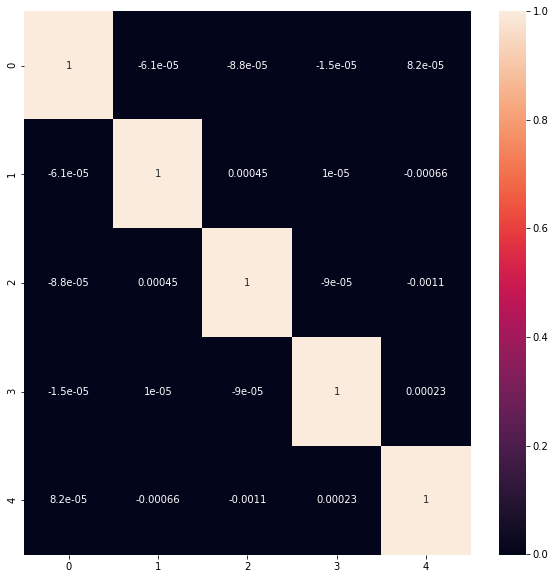

In [201]:
plt.figure(figsize=[10,10])
sns.heatmap(corrmat, annot=True)

# k Means clustering

In [202]:
#dividing into three clusters to label countries as under_developed,developing and developed
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(data_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [203]:
kmeans.labels_

array([1, 0, 0, 1, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 1,
       0, 2, 0, 1, 1, 0, 1, 2, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 2, 2,
       2, 0, 0, 0, 0, 1, 1, 0, 0, 2, 2, 1, 1, 0, 2, 1, 2, 0, 0, 1, 1, 0,
       1, 0, 2, 0, 0, 0, 1, 2, 2, 2, 0, 2, 0, 0, 1, 1, 2, 0, 1, 0, 0, 1,
       1, 0, 0, 2, 0, 1, 1, 0, 0, 1, 2, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       2, 2, 1, 1, 2, 0, 1, 0, 0, 0, 0, 0, 2, 2, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 2, 2, 2, 0, 1, 2, 2, 0, 0, 1, 0, 2, 2, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1])

In [204]:
# assign the label to original data
data['cluster_id_k_means'] = kmeans.labels_
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id_k_means
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0


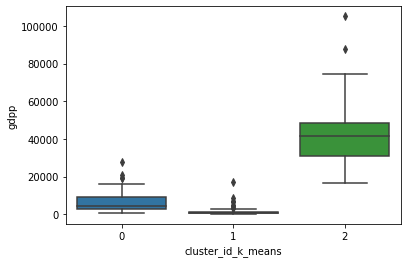

In [205]:
sns.boxplot(x='cluster_id_k_means', y='gdpp', data=data)

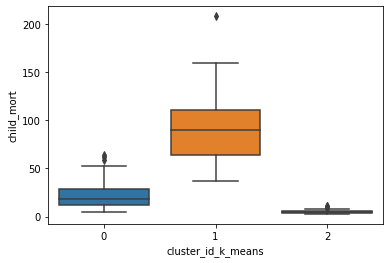

In [206]:
sns.boxplot(x='cluster_id_k_means', y='child_mort', data=data)

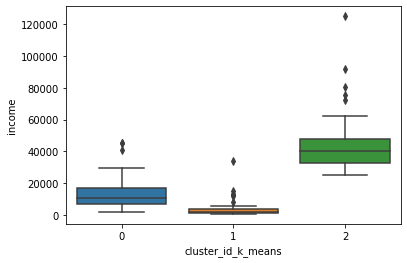

In [207]:
sns.boxplot(x='cluster_id_k_means', y='income', data=data)

cluster_id 1 countries has very low gdpp,high child_mort and least income hence thet are in the dire need 

In [208]:
data_pca_clusters=pd.DataFrame(data_pca)
data_pca_clusters.columns=['c1','c2','c3','c4','c5']

In [209]:
data_pca_clusters.head()

,c1,c2,c3,c4,c5
0,-2.925200,0.094579,0.823525,0.879245,0.150368
1,0.434893,-0.586595,0.121626,-1.227584,-0.082635
2,-0.372149,-0.459166,-1.620004,-0.542689,0.282545
3,-3.052096,1.684398,-1.694062,1.283099,0.326547
4,1.061850,0.135765,0.162875,-0.860802,-0.457524


In [210]:
#assigning labels to pca data
data_pca_clusters['cluster_id_k_means']=kmeans.labels_

In [211]:
data_pca_clusters['country']=data['country']

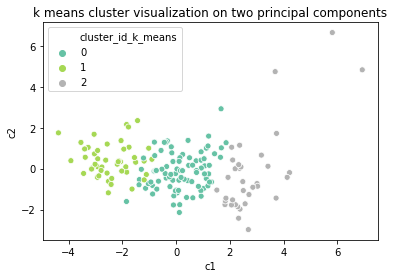

In [213]:
sns.scatterplot(x='c1',y='c2',data=data_pca_clusters,hue='cluster_id_k_means',palette='Set2')
plt.title('k means cluster visualization on two principal components')
plt.show()

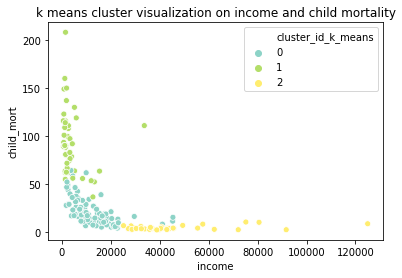

In [222]:
sns.scatterplot(x='income',y='child_mort',data=data,hue='cluster_id_k_means',palette='Set3')
plt.title('k means cluster visualization on income and child mortality')
plt.show()

# Hierarchical Clustering

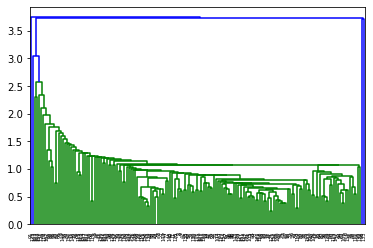

In [165]:
# single linkage
mergings_single = linkage(data_pca, method="single", metric='euclidean')
dendrogram(mergings_single)
plt.show()

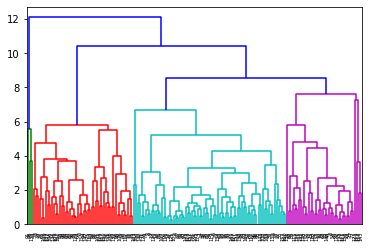

In [166]:
# complete linkage
mergings_complete = linkage(data_pca, method="complete", metric='euclidean')
dendrogram(mergings_complete)
plt.show()

In [168]:
# 3 clusters
cluster_labels_complete = cut_tree(mergings_complete, n_clusters=3).reshape(-1, )
cluster_labels_complete

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 2, 1, 0, 0, 1, 1, 0, 2, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 2, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0])

In [214]:
cluster_labels_single = cut_tree(mergings_single, n_clusters=3).reshape(-1, )
cluster_labels_single

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

It can be clearly analysed that single linkage clustering is not giving correct results, most of the countries lying in the same clusters except theree countries

In [215]:
# assign the label to original data
data['cluster_id_hierarchical'] = cluster_labels_complete
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id_k_means,cluster_id_hierarchical
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0,1


In [239]:
data.loc[data['country']=='United States',:]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id_k_means,cluster_id_hierarchical
159,United States,7.3,12.4,17.9,15.8,49400,1.22,78.7,1.93,48400,2,1


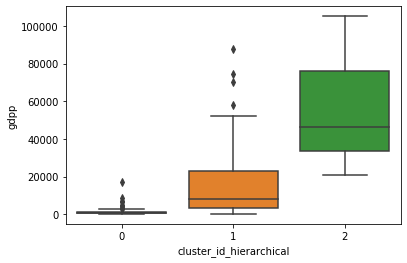

In [216]:
sns.boxplot(x='cluster_id_hierarchical', y='gdpp', data=data)

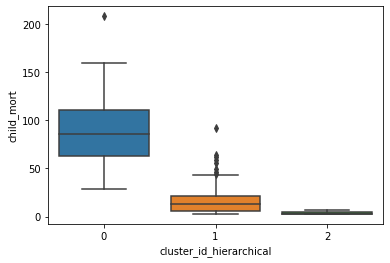

In [217]:
sns.boxplot(x='cluster_id_hierarchical', y='child_mort', data=data)

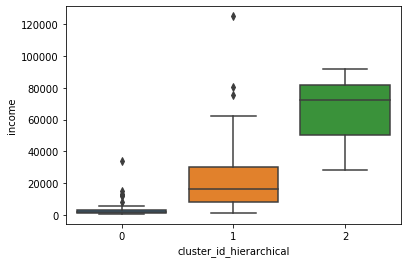

In [218]:
sns.boxplot(x='cluster_id_hierarchical', y='income', data=data)

cluster_id 0 countries has very low gdpp,high child_mort and least income hence thet are in the dire need 

In [219]:
data_pca_clusters['cluster_id_hierarchical']=cluster_labels_complete

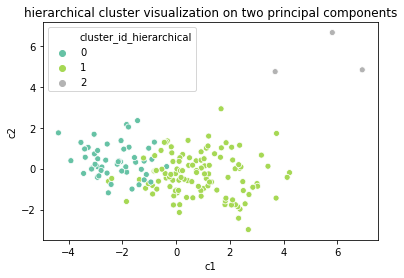

In [220]:
sns.scatterplot(x='c1',y='c2',data=data_pca_clusters,hue='cluster_id_hierarchical',palette='Set2')
plt.title('hierarchical cluster visualization on two principal components')
plt.show()

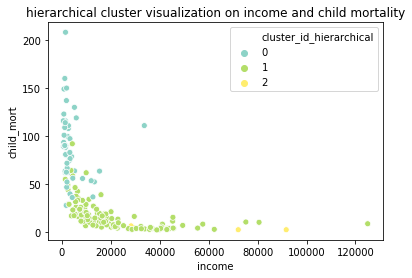

In [223]:
sns.scatterplot(x='income',y='child_mort',data=data,hue='cluster_id_hierarchical',palette='Set3')
plt.title('hierarchical cluster visualization on income and child mortality')
plt.show()

In [230]:
k_means_count=data.groupby(by='cluster_id_k_means')['country'].nunique()

In [231]:
k_means_count

cluster_id_k_means
0    85
1    47
2    35
Name: country, dtype: int64

In [232]:
hierarchical_count=data.groupby(by='cluster_id_hierarchical')['country'].nunique()

In [233]:
hierarchical_count

cluster_id_hierarchical
0     50
1    114
2      3
Name: country, dtype: int64

#### k means model seems to be more accurate having all most equal number of countries in each clusters
hierarchical clustering has only 3 countries as developed countries even united states and many other developed comes under developing country according to hierarchical clustering model while k means seems to giving correct result
so going forward with k means clustering model

## list of countries where money should be spent

In [246]:
final_list=data.loc[data['cluster_id_k_means']==1,'country']

In [247]:
final_list

0                   Afghanistan
3                        Angola
17                        Benin
21                     Botswana
25                 Burkina Faso
26                      Burundi
28                     Cameroon
31     Central African Republic
32                         Chad
36                      Comoros
37             Congo, Dem. Rep.
38                  Congo, Rep.
40                Cote d'Ivoire
49            Equatorial Guinea
50                      Eritrea
55                        Gabon
56                       Gambia
59                        Ghana
63                       Guinea
64                Guinea-Bissau
66                        Haiti
72                         Iraq
80                        Kenya
81                     Kiribati
84                          Lao
87                      Lesotho
88                      Liberia
93                   Madagascar
94                       Malawi
97                         Mali
99                   Mauritania
106     